# Analysis of itemized individual contributions: Donald Trump

This is a rough notebook we used to analyzed itemized individual contributions filed by campaigns to the [Federal Election Commission (FEC)](https://www.fec.gov/data/). Campaigns are required to make monthly and quarterly filings (this notebook works for *monthly* filings). 

The notebook below is for **Donald J. Trump for President 2024, Inc.** campaign. An almost identical notebook is present in the repo for Democrat, Kamala Harris.

## Import packages

In [1]:
import pandas as pd
import plotly
from chart_studio import plotly
from plotnine import *
# import MySQLdb
import fecfile
import requests
import time
# import sqlalchemy
#import pickle
import datetime
import numpy as np

## Data dictionary

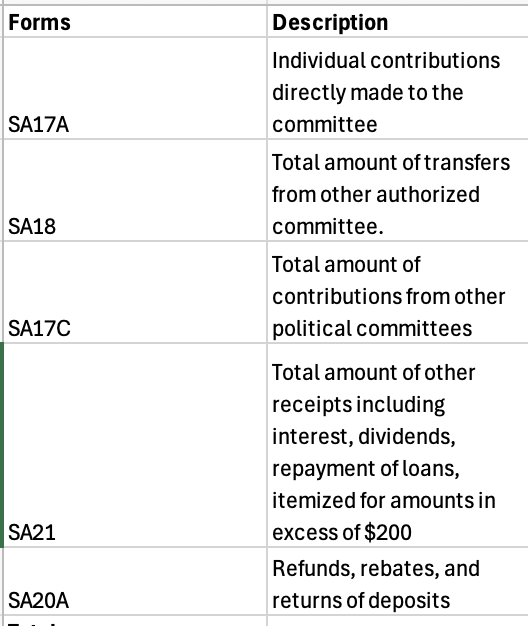

## Get file number for F3PN for each campaign

F3PN is for contributions and expenses. F3PN is for contributions and expenses. Below, you need to input the **file number** in the code to work. You can find that in the filings section of each campaign on the FEC website.

- Kamala Harris for President
- Donald J. Trump for President 2024, Inc.

In [2]:
filing = fecfile.from_http('1812280') #file no for Trump
# filing

/opt/homebrew/lib/python3.10/site-packages/fecfile/fecparser.py:210: FecParserTypeWarning: cannot parse value: 8333167.96, as type: date, for field: coverage_from_date, in form: F3PZ1, version: 8.4 (line 523063)
/opt/homebrew/lib/python3.10/site-packages/fecfile/fecparser.py:210: FecParserTypeWarning: cannot parse value: 0.00, as type: date, for field: coverage_through_date, in form: F3PZ1, version: 8.4 (line 523063)
/opt/homebrew/lib/python3.10/site-packages/fecfile/fecparser.py:210: FecParserTypeWarning: cannot parse value: 0.00, as type: date, for field: date_signed, in form: F3PZ1, version: 8.4 (line 523063)
/opt/homebrew/lib/python3.10/site-packages/fecfile/fecparser.py:210: FecParserTypeWarning: cannot parse value: 0.00, as type: date, for field: coverage_from_date, in form: F3PZ1, version: 8.4 (line 523064)
/opt/homebrew/lib/python3.10/site-packages/fecfile/fecparser.py:210: FecParserTypeWarning: cannot parse value: 0.00, as type: date, for field: coverage_through_date, in form:

## Schedule A: Contributions

Schedule B is for expenses

In [3]:
df = pd.DataFrame(filing['itemizations']['Schedule A'])
df.contribution_date=pd.to_datetime(df.contribution_date)
df.contribution_amount=pd.to_numeric(df.contribution_amount)
df[df.memo_code=='X'].to_clipboard(index=False)
# pd.set_option('display.max_columns', None)
df

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00828541,SA17A.122113967,,,PAC,WINRED,,,,...,,,,,,,,X,,
1,SA17A,C00828541,SA17A.122129412,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,...,,,,,,,,,CHARGEBACK,
2,SA17A,C00828541,SA17A.122129413,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,...,,,,,,,,,CHARGEBACK,
3,SA17A,C00828541,SA17A.122129414,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,...,,,,,,,,,CHARGEBACK,
4,SA17A,C00828541,SA17A.122129415,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,...,,,,,,,,,CHARGEBACK,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521445,SA21,C00828541,SA21.122481960,,,IND,,ROBERTS,JACQUELYN,L,...,,,,,,,,X,,
521446,SA21,C00828541,SA21.125560868,,,IND,,SMITH,DONALD,CHESTER,...,,,,,,,,X,,
521447,SA21,C00828541,SA21.125563959,,,IND,,TAYLOR,RICHARD,D,...,,,,,,,,X,,
521448,SA21,C00828541,SA21.125560055,,,IND,,THIENES,BRIAN,LOWELL,...,,,,,,,,X,,


In [4]:
df.form_type.value_counts()

SA18     491975
SA17A     29447
SA21         19
SA20A         5
SA17C         4
Name: form_type, dtype: int64

## SA17A: direct contributions

In [5]:
sa17a= df[df.form_type=='SA17A']
sa17a

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00828541,SA17A.122113967,,,PAC,WINRED,,,,...,,,,,,,,X,,
1,SA17A,C00828541,SA17A.122129412,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,...,,,,,,,,,CHARGEBACK,
2,SA17A,C00828541,SA17A.122129413,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,...,,,,,,,,,CHARGEBACK,
3,SA17A,C00828541,SA17A.122129414,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,...,,,,,,,,,CHARGEBACK,
4,SA17A,C00828541,SA17A.122129415,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,...,,,,,,,,,CHARGEBACK,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29442,SA17A,C00828541,SA17A.125415211,,,IND,,ZWICKLBAUER,CAROL,,...,,,,,,,,,,
29443,SA17A,C00828541,SA17A.124939542,,,IND,,ZWIEFELHOFER,JAY,,...,,,,,,,,,,
29444,SA17A,C00828541,SA17A.122763303,,,IND,,ZWINK,GLADY,V,...,,,,,,,,,,
29445,SA17A,C00828541,SA17A.125132441,,,IND,,ZYCK,WILLIAM,,...,,,,,,,,,,


In [13]:
sa17a.entity_type.value_counts()

IND    29419
PAC       28
Name: entity_type, dtype: int64

### SA17A: removing the memo code

In [6]:
sa17a_memo = sa17a[sa17a.memo_code!='X']
sa17a_memo

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
1,SA17A,C00828541,SA17A.122129412,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,...,,,,,,,,,CHARGEBACK,
2,SA17A,C00828541,SA17A.122129413,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,...,,,,,,,,,CHARGEBACK,
3,SA17A,C00828541,SA17A.122129414,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,...,,,,,,,,,CHARGEBACK,
4,SA17A,C00828541,SA17A.122129415,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,...,,,,,,,,,CHARGEBACK,
5,SA17A,C00828541,SA17A.122129417,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,...,,,,,,,,,CHARGEBACK,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29442,SA17A,C00828541,SA17A.125415211,,,IND,,ZWICKLBAUER,CAROL,,...,,,,,,,,,,
29443,SA17A,C00828541,SA17A.124939542,,,IND,,ZWIEFELHOFER,JAY,,...,,,,,,,,,,
29444,SA17A,C00828541,SA17A.122763303,,,IND,,ZWINK,GLADY,V,...,,,,,,,,,,
29445,SA17A,C00828541,SA17A.125132441,,,IND,,ZYCK,WILLIAM,,...,,,,,,,,,,


In [7]:
sa17a_memo.contribution_amount.sum()

4931261.95

In [10]:
# sa17a_memo.to_clipboard(index=False)

In [15]:
sa17a_memo.entity_type.value_counts()

IND    29223
Name: entity_type, dtype: int64

## Check: Just the memo codes

In [16]:
memo_x= sa17a[sa17a.memo_code=='X']
memo_x

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00828541,SA17A.122113967,,,PAC,WINRED,,,,...,,,,,,,,X,,
6,SA17A,C00828541,SA17A.122267859,,,PAC,WINRED,,,,...,,,,,,,,X,,
139,SA17A,C00828541,SA17A.122345424,,,PAC,WINRED,,,,...,,,,,,,,X,,
413,SA17A,C00828541,SA17A.122371882,,,PAC,WINRED,,,,...,,,,,,,,X,,
694,SA17A,C00828541,SA17A.122452860,,,PAC,WINRED,,,,...,,,,,,,,X,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28656,SA17A,C00828541,SA17A.125006669.2,,,IND,,WILCOX,DANIELLE,,...,,,,,,,,X,,
28687,SA17A,C00828541,SA17A.122126943.1,,,IND,,WILKIE,LEIGHTON,JAMES,...,,,,,,,,X,,
28688,SA17A,C00828541,SA17A.122126943.2,,,IND,,WILKIE,LEIGHTON,JAMES,...,,,,,,,,X,,
28789,SA17A,C00828541,SA17A.122481961.1,,,IND,,WILLIS,CATHERINE,M.,...,,,,,,,,X,,


In [17]:
memo_x.contribution_amount.sum()

96177.36

In [24]:
memo_x.entity_type.value_counts()

IND    196
PAC     28
Name: entity_type, dtype: int64

In [20]:
memo_x.to_clipboard(index=False)

## Filter all individual contributions in SA17A

In [21]:
sa17a_IND = sa17a[sa17a.entity_type=='IND'].reset_index(drop=True)
sa17a_IND

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00828541,SA17A.122129412,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,...,,,,,,,,,CHARGEBACK,
1,SA17A,C00828541,SA17A.122129413,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,...,,,,,,,,,CHARGEBACK,
2,SA17A,C00828541,SA17A.122129414,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,...,,,,,,,,,CHARGEBACK,
3,SA17A,C00828541,SA17A.122129415,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,...,,,,,,,,,CHARGEBACK,
4,SA17A,C00828541,SA17A.122129417,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,...,,,,,,,,,CHARGEBACK,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29414,SA17A,C00828541,SA17A.125415211,,,IND,,ZWICKLBAUER,CAROL,,...,,,,,,,,,,
29415,SA17A,C00828541,SA17A.124939542,,,IND,,ZWIEFELHOFER,JAY,,...,,,,,,,,,,
29416,SA17A,C00828541,SA17A.122763303,,,IND,,ZWINK,GLADY,V,...,,,,,,,,,,
29417,SA17A,C00828541,SA17A.125132441,,,IND,,ZYCK,WILLIAM,,...,,,,,,,,,,


In [22]:
sa17a_IND.contribution_amount.sum()

4907143.95

In [25]:
def categorize_amount(amount):
    if 1 <= amount <= 24:
        return '1-24'
    if 25 <= amount <= 49:
        return '25-49'
    elif 50 <= amount <= 74:
        return '50-74'
    elif 75 <= amount <= 99:
        return '75-99'
    elif 100 <= amount <= 149:
        return '100-149'
    elif 150 <= amount <= 199:
        return '150-199'
    elif amount >= 200:
        return '200 and over'
    else:
        return 'Below 1'

In [13]:
sa17a_IND['range'] = sa17a_IND['contribution_amount'].apply(categorize_amount)
sa17a_IND

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code,range
0,SA17A,C00828541,SA17A.118147923,SA17A.118143196,SA17A,IND,,STEWART,SUSAN,,...,,,,,,,,CHARGEBACK,,Below 1
1,SA17A,C00828541,SA17A.118027135,SA17A.118144806,SA17A,IND,,EAGAN,LARRY,,...,,,,,,,,CHARGEBACK,,Below 1
2,SA17A,C00828541,SA17A.118027132,SA17A.118144806,SA17A,IND,,KHACHADOURIAN,KEVIN,,...,,,,,,,,CHARGEBACK,,Below 1
3,SA17A,C00828541,SA17A.118027133,SA17A.118144806,SA17A,IND,,KHACHADOURIAN,KEVIN,,...,,,,,,,,CHARGEBACK,,Below 1
4,SA17A,C00828541,SA17A.118027134,SA17A.118144806,SA17A,IND,,KHACHADOURIAN,KEVIN,,...,,,,,,,,CHARGEBACK,,Below 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,SA17A,C00828541,SA17A.118995517,,,IND,,ZWINK,GLADY,V,...,,,,,,,,,,100-149
29096,SA17A,C00828541,SA17A.118949488,,,IND,,ZYCH,ANDREW,,...,,,,,,,,,,100-149
29097,SA17A,C00828541,SA17A.119156522,,,IND,,ZYLSTRA,WILLIAM,G,...,,,,,,,,,,25-49
29098,SA17A,C00828541,SA17A.118998329,,,IND,,ZYNN,NANCY,C,...,,,,,,,,,,200 and over


In [14]:
categories= sa17a_IND.groupby('range').contribution_amount.sum()
categories

range
1-24              70250.92
100-149          520620.28
150-199          110604.92
200 and over    3692886.51
25-49            100374.69
50-74            139764.64
75-99             40143.06
Below 1         -278571.50
Name: contribution_amount, dtype: float64

In [15]:
categories_by_date = sa17a_IND.groupby('range').resample('D', on='contribution_date').contribution_amount.sum().to_frame()
categories_by_date

contribution_amount
range   contribution_date                             
1-24    2024-05-25 00:00:00-04:00                 9.00
        2024-05-26 00:00:00-04:00                 0.00
        2024-05-27 00:00:00-04:00                 0.00
        2024-05-28 00:00:00-04:00                 0.00
        2024-05-29 00:00:00-04:00                 0.00
...                                                ...
Below 1 2024-06-26 00:00:00-04:00              -401.20
        2024-06-27 00:00:00-04:00             -4432.70
        2024-06-28 00:00:00-04:00             -1731.78
        2024-06-29 00:00:00-04:00               -69.04
        2024-06-30 00:00:00-04:00             -1278.82

[261 rows x 1 columns]

In [16]:
categories_by_date.to_csv('dated contributions in buckets_trump.csv')

In [17]:
sa17a_IND_200_wide = sa17a_IND.pivot_table(columns= "transaction_id", index="contribution_date", values='contribution_amount', aggfunc='sum', fill_value='0', dropna=False).reset_index()
sa17a_IND_200_wide.head(10)

transaction_id,contribution_date,SA11AI.119159078.1,SA17A.116373961,SA17A.116373961.1,SA17A.116373961.2,SA17A.117068991,SA17A.117068991.1,SA17A.117068991.2,SA17A.117390545,SA17A.117390545.1,...,SA17A.122284693,SA17A.122284696,SA17A.122284699,SA17A.122284701,SA17A.122284702,SA17A.122284703,SA17A.122284705,SA17A.122284707,SA17A.122284708,SA17A.122575828
0,2024-05-17 00:00:00-04:00,0,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2024-05-25 00:00:00-04:00,0,0,0,0,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2024-05-29 00:00:00-04:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2024-05-31 00:00:00-04:00,0,0,0,0,0,0,0,100.0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024-06-01 00:00:00-04:00,0,0,0,0,0,-9.0,9.0,0,-23.14,...,0,0,0,0,0,0,0,0,0,0
5,2024-06-02 00:00:00-04:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2024-06-03 00:00:00-04:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2024-06-04 00:00:00-04:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2024-06-05 00:00:00-04:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2024-06-06 00:00:00-04:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
sa17a_IND_200_long = pd.melt(sa17a_IND_200_wide, id_vars=['contribution_date'], value_name='contribution_amount', \
                   var_name='transaction_id')
sa17a_IND_200_long

,contribution_date,transaction_id,contribution_amount
0,2024-05-17 00:00:00-04:00,SA11AI.119159078.1,0
1,2024-05-25 00:00:00-04:00,SA11AI.119159078.1,0
2,2024-05-29 00:00:00-04:00,SA11AI.119159078.1,0
3,2024-05-31 00:00:00-04:00,SA11AI.119159078.1,0
4,2024-06-01 00:00:00-04:00,SA11AI.119159078.1,0
...,...,...,...
989395,2024-06-26 00:00:00-04:00,SA17A.122575828,0
989396,2024-06-27 00:00:00-04:00,SA17A.122575828,0
989397,2024-06-28 00:00:00-04:00,SA17A.122575828,0
989398,2024-06-29 00:00:00-04:00,SA17A.122575828,0


In [19]:
sa17a_IND_200_long.contribution_amount = sa17a_IND_200_long.contribution_amount.astype(float)

In [20]:
sa17a_IND_200_long = sa17a_IND_200_long[sa17a_IND_200_long.contribution_amount>=1]
sa17a_IND_200_long

,contribution_date,transaction_id,contribution_amount
34,2024-05-17 00:00:00-04:00,SA17A.116373961,100.0
122,2024-06-17 00:00:00-04:00,SA17A.116373961.2,100.0
137,2024-05-25 00:00:00-04:00,SA17A.117068991,9.0
208,2024-06-01 00:00:00-04:00,SA17A.117068991.2,9.0
241,2024-05-31 00:00:00-04:00,SA17A.117390545,100.0
...,...,...,...
980185,2024-06-30 00:00:00-04:00,SA17A.122284273,1.0
980218,2024-06-29 00:00:00-04:00,SA17A.122284274,1.0
980252,2024-06-29 00:00:00-04:00,SA17A.122284275,1.0
980286,2024-06-29 00:00:00-04:00,SA17A.122284276,1.0


In [21]:
# (
#     ggplot(sa17a_IND_200_long, aes('contribution_date','contribution_amount')) +
#            geom_point(color="blue") +
#            theme(figure_size=(14,8)) +
#            theme(subplots_adjust={'wspace': 0.25}, axis_text_x=element_text(rotation=90)) +
#            labs(x= "Date", y="Contributions", title="Individual contributions")
# )

## Simple chart of SA17A

In [26]:
sa17a_IND_chart = sa17a_memo.resample('D', on='contribution_date').contribution_amount.sum().to_frame().reset_index()
sa17a_IND_chart

,contribution_date,contribution_amount
0,2024-07-01 00:00:00-04:00,378672.87
1,2024-07-02 00:00:00-04:00,121155.10
2,2024-07-03 00:00:00-04:00,207731.46
3,2024-07-04 00:00:00-04:00,4078.13
4,2024-07-05 00:00:00-04:00,678405.16
5,2024-07-06 00:00:00-04:00,2787.39
6,2024-07-07 00:00:00-04:00,2411.08
7,2024-07-08 00:00:00-04:00,133346.89
8,2024-07-09 00:00:00-04:00,101601.45
9,2024-07-10 00:00:00-04:00,146289.68


In [27]:
sa17a_IND_chart = sa17a_IND_chart.sort_values('contribution_date')
sa17a_IND_chart = sa17a_IND_chart[sa17a_IND_chart.contribution_date>='2024-07-01'].reset_index(drop=True) #only June
sa17a_IND_chart

,contribution_date,contribution_amount
0,2024-07-01 00:00:00-04:00,378672.87
1,2024-07-02 00:00:00-04:00,121155.10
2,2024-07-03 00:00:00-04:00,207731.46
3,2024-07-04 00:00:00-04:00,4078.13
4,2024-07-05 00:00:00-04:00,678405.16
5,2024-07-06 00:00:00-04:00,2787.39
6,2024-07-07 00:00:00-04:00,2411.08
7,2024-07-08 00:00:00-04:00,133346.89
8,2024-07-09 00:00:00-04:00,101601.45
9,2024-07-10 00:00:00-04:00,146289.68


In [24]:
# sa17a_IND_chart.to_csv('direct_cumulative.csv', index=False)

<AxesSubplot:title={'center':'Individual direct contributions to the Trump campaign'}, xlabel='contribution_date'>

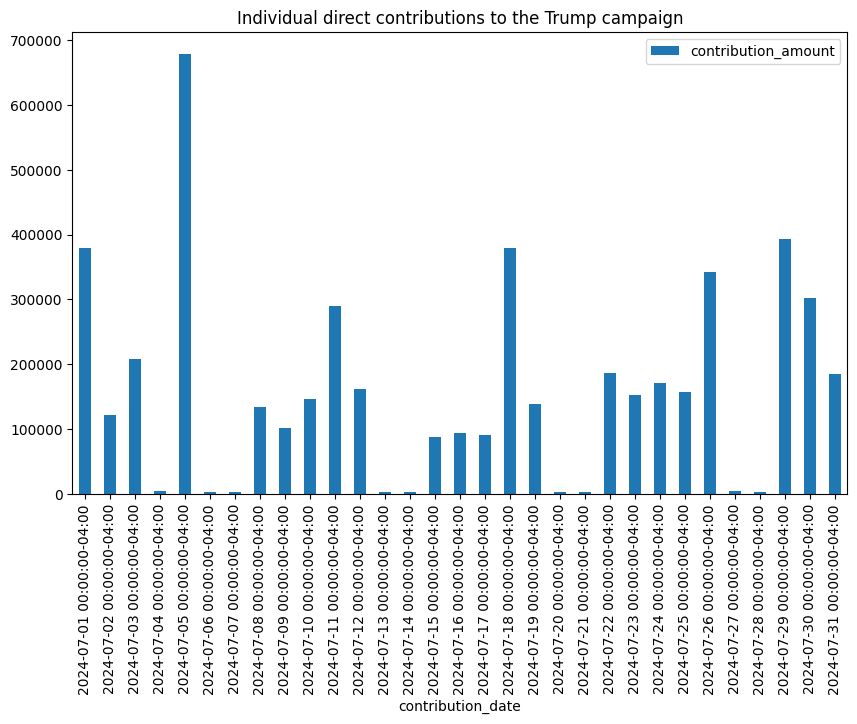

In [28]:
sa17a_IND_chart.plot(x='contribution_date', y='contribution_amount', kind='bar', figsize=(10,6), title='Individual direct contributions to the Trump campaign')

## SA18: transfers from authorized committee

In [29]:
sa18= df[df.form_type=='SA18']
pd.set_option('display.max_columns', 50)
sa18

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
29451,SA18,C00828541,SA18.126966200,,,COM,DONALD J. TRUMP REPUBLICAN NOMINEE FUND 2024,,,,,,"C/O RED CURVE SOLUTIONS, LLC","138 CONANT ST, STE 401",BEVERLY,MA,01915,G2024,,2024-07-31 00:00:00-04:00,29133.95,29133.95,TRANSFER FROM AFFILIATED COMMITTEE,,,C00867275,DONALD J. TRUMP REPUBLICAN NOMINEE FUND 2024,,,,,,,,,,,,,,,,,,
29452,SA18,C00828541,SA18.125634035,,,COM,"TRUMP 47 COMMITTEE, INC.",,,,,,P.O. BOX 509,,ARLINGTON,VA,22216,G2024,,2024-07-31 00:00:00-04:00,3233863.88,12459239.67,JFC TRANSFER: SEE ATTRIBUTIONS ABOVE ITEMIZATI...,,,,,,,,,,,,,,,,,,,,,,
29453,SA18,C00828541,SA18.125636719,SA18.125634035,SA18,IND,,ABBOTT,AARON,,,,507 HICKORY HILL RD,,SAPULPA,OK,74066,G2024,,2024-07-22 00:00:00-04:00,3300.00,3300.00,"JFC TRANSFER: TRUMP 47 COMMITTEE, INC.",COVINGTON AIRCRAFT,BUSINESSMAN,,,,,,,,,,,,,,,,,,X,,
29454,SA18,C00828541,SA18.125636003,SA18.125634035,SA18,IND,,ABERS,ANNA,,,,4600 VIA DOLCE,APT 306,MARINA DEL REY,CA,90292,G2024,,2024-06-06 00:00:00-04:00,1700.00,5000.00,"JFC TRANSFER: TRUMP 47 COMMITTEE, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
29455,SA18,C00828541,SA18.125636038,SA18.125634035,SA18,IND,,ABIKASIS,DANIEL,,,,18645 PASADERO DR,,TARZANA,CA,91356,G2024,,2024-06-06 00:00:00-04:00,1700.00,5000.00,"JFC TRANSFER: TRUMP 47 COMMITTEE, INC.",KASIS CONSTRUCTION,HOME BUILDER,,,,,,,,,,,,,,,,,,X,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521421,SA18,C00828541,SA18.127439497,SA18.126030682,SA18,IND,,TRUE,LYNDA,,,,11872 S EL CAMINO DEL DIABLO,,YUMA,AZ,85367,P2024,,2024-07-04 00:00:00-04:00,5.00,256.62,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
521422,SA18,C00828541,SA18.127439498,SA18.126030682,SA18,IND,,TRUE,LYNDA,,,,11872 S EL CAMINO DEL DIABLO,,YUMA,AZ,85367,P2024,,2024-07-04 00:00:00-04:00,5.00,256.62,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
521423,SA18,C00828541,SA18.127241621,SA18.126030682,SA18,PAC,AMERICAN GRIT PAC,,,,,,824 S MILLEDGE AVE,STE 101,ATHENS,GA,30605,P2024,,2024-06-06 00:00:00-04:00,3300.00,3300.00,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,,,C00756551,AMERICAN GRIT PAC,,,,,,,,,,,,,,,,X,,
521424,SA18,C00828541,SA18.127253033,SA18.126030682,SA18,CCM,KAT FOR CONGRESS,,,,,,5200 NW 43RD ST,STE 102,GAINESVILLE,FL,32606,P2024,,2024-06-06 00:00:00-04:00,1700.00,1700.00,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,,,C00730895,KAT FOR CONGRESS,H0FL03175,CAMMACK,KAT,,,,H,FL,03,,,,,,,X,,


In [30]:
sa18= sa18.reset_index(drop=True)
sa18

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA18,C00828541,SA18.126966200,,,COM,DONALD J. TRUMP REPUBLICAN NOMINEE FUND 2024,,,,,,"C/O RED CURVE SOLUTIONS, LLC","138 CONANT ST, STE 401",BEVERLY,MA,01915,G2024,,2024-07-31 00:00:00-04:00,29133.95,29133.95,TRANSFER FROM AFFILIATED COMMITTEE,,,C00867275,DONALD J. TRUMP REPUBLICAN NOMINEE FUND 2024,,,,,,,,,,,,,,,,,,
1,SA18,C00828541,SA18.125634035,,,COM,"TRUMP 47 COMMITTEE, INC.",,,,,,P.O. BOX 509,,ARLINGTON,VA,22216,G2024,,2024-07-31 00:00:00-04:00,3233863.88,12459239.67,JFC TRANSFER: SEE ATTRIBUTIONS ABOVE ITEMIZATI...,,,,,,,,,,,,,,,,,,,,,,
2,SA18,C00828541,SA18.125636719,SA18.125634035,SA18,IND,,ABBOTT,AARON,,,,507 HICKORY HILL RD,,SAPULPA,OK,74066,G2024,,2024-07-22 00:00:00-04:00,3300.00,3300.00,"JFC TRANSFER: TRUMP 47 COMMITTEE, INC.",COVINGTON AIRCRAFT,BUSINESSMAN,,,,,,,,,,,,,,,,,,X,,
3,SA18,C00828541,SA18.125636003,SA18.125634035,SA18,IND,,ABERS,ANNA,,,,4600 VIA DOLCE,APT 306,MARINA DEL REY,CA,90292,G2024,,2024-06-06 00:00:00-04:00,1700.00,5000.00,"JFC TRANSFER: TRUMP 47 COMMITTEE, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
4,SA18,C00828541,SA18.125636038,SA18.125634035,SA18,IND,,ABIKASIS,DANIEL,,,,18645 PASADERO DR,,TARZANA,CA,91356,G2024,,2024-06-06 00:00:00-04:00,1700.00,5000.00,"JFC TRANSFER: TRUMP 47 COMMITTEE, INC.",KASIS CONSTRUCTION,HOME BUILDER,,,,,,,,,,,,,,,,,,X,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491970,SA18,C00828541,SA18.127439497,SA18.126030682,SA18,IND,,TRUE,LYNDA,,,,11872 S EL CAMINO DEL DIABLO,,YUMA,AZ,85367,P2024,,2024-07-04 00:00:00-04:00,5.00,256.62,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
491971,SA18,C00828541,SA18.127439498,SA18.126030682,SA18,IND,,TRUE,LYNDA,,,,11872 S EL CAMINO DEL DIABLO,,YUMA,AZ,85367,P2024,,2024-07-04 00:00:00-04:00,5.00,256.62,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
491972,SA18,C00828541,SA18.127241621,SA18.126030682,SA18,PAC,AMERICAN GRIT PAC,,,,,,824 S MILLEDGE AVE,STE 101,ATHENS,GA,30605,P2024,,2024-06-06 00:00:00-04:00,3300.00,3300.00,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,,,C00756551,AMERICAN GRIT PAC,,,,,,,,,,,,,,,,X,,
491973,SA18,C00828541,SA18.127253033,SA18.126030682,SA18,CCM,KAT FOR CONGRESS,,,,,,5200 NW 43RD ST,STE 102,GAINESVILLE,FL,32606,P2024,,2024-06-06 00:00:00-04:00,1700.00,1700.00,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,,,C00730895,KAT FOR CONGRESS,H0FL03175,CAMMACK,KAT,,,,H,FL,03,,,,,,,X,,


In [31]:
sa18.entity_type.value_counts()

IND    491920
ORG        26
PAC        17
COM         8
CCM         4
Name: entity_type, dtype: int64

In [32]:
sa18.contribution_amount.sum()

67540935.21000002

In [34]:
sa18.to_clipboard(index=False)

## Filter only individuals

In [35]:
sa18_IND = sa18[sa18.entity_type=="IND"]
sa18_IND

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
2,SA18,C00828541,SA18.125636719,SA18.125634035,SA18,IND,,ABBOTT,AARON,,,,507 HICKORY HILL RD,,SAPULPA,OK,74066,G2024,,2024-07-22 00:00:00-04:00,3300.00,3300.00,"JFC TRANSFER: TRUMP 47 COMMITTEE, INC.",COVINGTON AIRCRAFT,BUSINESSMAN,,,,,,,,,,,,,,,,,,X,,
3,SA18,C00828541,SA18.125636003,SA18.125634035,SA18,IND,,ABERS,ANNA,,,,4600 VIA DOLCE,APT 306,MARINA DEL REY,CA,90292,G2024,,2024-06-06 00:00:00-04:00,1700.00,5000.00,"JFC TRANSFER: TRUMP 47 COMMITTEE, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
4,SA18,C00828541,SA18.125636038,SA18.125634035,SA18,IND,,ABIKASIS,DANIEL,,,,18645 PASADERO DR,,TARZANA,CA,91356,G2024,,2024-06-06 00:00:00-04:00,1700.00,5000.00,"JFC TRANSFER: TRUMP 47 COMMITTEE, INC.",KASIS CONSTRUCTION,HOME BUILDER,,,,,,,,,,,,,,,,,,X,,
5,SA18,C00828541,SA18.125636037,SA18.125634035,SA18,IND,,ABIKASIS,GABRIEL,,,,4211 TEESDALE AVE,,STUDIO CITY,CA,91604,G2024,,2024-06-06 00:00:00-04:00,1700.00,5000.00,"JFC TRANSFER: TRUMP 47 COMMITTEE, INC.",KASIS CONSTRUCTION,HOME BUILDER,,,,,,,,,,,,,,,,,,X,,
6,SA18,C00828541,SA18.125636036,SA18.125634035,SA18,IND,,ABIKASIS,MICHAEL,,,,12116 LOUISE AVE,,LOS ANGELES,CA,90066,G2024,,2024-06-06 00:00:00-04:00,1700.00,5000.00,"JFC TRANSFER: TRUMP 47 COMMITTEE, INC.",PAINTING LA INC,CONTRACTOR,,,,,,,,,,,,,,,,,,X,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491967,SA18,C00828541,SA18.127518842,SA18.126030682,SA18,IND,,ZYWICIEL,DALE,,,,10 WHITECLIFF,,LAGUNA NIGUEL,CA,92677,P2024,,2024-07-15 00:00:00-04:00,24.47,531.64,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
491968,SA18,C00828541,SA18.127552877,SA18.126030682,SA18,IND,,TRUE,JEFFREY,,,,4116 MAIN ST,,UNION GAP,WA,98903,P2024,,2024-06-15 00:00:00-04:00,52.05,478.86,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,SELF-EMPLOYED,USED AUTO DEALERSHIP,,,,,,,,,,,,,,,,,,X,,
491969,SA18,C00828541,SA18.127552878,SA18.126030682,SA18,IND,,TRUE,JEFFREY,,,,4116 MAIN ST,,UNION GAP,WA,98903,P2024,,2024-07-15 00:00:00-04:00,52.05,478.86,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,SELF-EMPLOYED,USED AUTO DEALERSHIP,,,,,,,,,,,,,,,,,,X,,
491970,SA18,C00828541,SA18.127439497,SA18.126030682,SA18,IND,,TRUE,LYNDA,,,,11872 S EL CAMINO DEL DIABLO,,YUMA,AZ,85367,P2024,,2024-07-04 00:00:00-04:00,5.00,256.62,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,


In [36]:
sa18_IND['range'] = sa18_IND['contribution_amount'].apply(categorize_amount)
sa18_IND

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_2521/2533961651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code,range
2,SA18,C00828541,SA18.125636719,SA18.125634035,SA18,IND,,ABBOTT,AARON,,,,507 HICKORY HILL RD,,SAPULPA,OK,74066,G2024,,2024-07-22 00:00:00-04:00,3300.00,3300.00,"JFC TRANSFER: TRUMP 47 COMMITTEE, INC.",COVINGTON AIRCRAFT,BUSINESSMAN,,,,,,,,,,,,,,,,,,X,,,200 and over
3,SA18,C00828541,SA18.125636003,SA18.125634035,SA18,IND,,ABERS,ANNA,,,,4600 VIA DOLCE,APT 306,MARINA DEL REY,CA,90292,G2024,,2024-06-06 00:00:00-04:00,1700.00,5000.00,"JFC TRANSFER: TRUMP 47 COMMITTEE, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,,200 and over
4,SA18,C00828541,SA18.125636038,SA18.125634035,SA18,IND,,ABIKASIS,DANIEL,,,,18645 PASADERO DR,,TARZANA,CA,91356,G2024,,2024-06-06 00:00:00-04:00,1700.00,5000.00,"JFC TRANSFER: TRUMP 47 COMMITTEE, INC.",KASIS CONSTRUCTION,HOME BUILDER,,,,,,,,,,,,,,,,,,X,,,200 and over
5,SA18,C00828541,SA18.125636037,SA18.125634035,SA18,IND,,ABIKASIS,GABRIEL,,,,4211 TEESDALE AVE,,STUDIO CITY,CA,91604,G2024,,2024-06-06 00:00:00-04:00,1700.00,5000.00,"JFC TRANSFER: TRUMP 47 COMMITTEE, INC.",KASIS CONSTRUCTION,HOME BUILDER,,,,,,,,,,,,,,,,,,X,,,200 and over
6,SA18,C00828541,SA18.125636036,SA18.125634035,SA18,IND,,ABIKASIS,MICHAEL,,,,12116 LOUISE AVE,,LOS ANGELES,CA,90066,G2024,,2024-06-06 00:00:00-04:00,1700.00,5000.00,"JFC TRANSFER: TRUMP 47 COMMITTEE, INC.",PAINTING LA INC,CONTRACTOR,,,,,,,,,,,,,,,,,,X,,,200 and over
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491967,SA18,C00828541,SA18.127518842,SA18.126030682,SA18,IND,,ZYWICIEL,DALE,,,,10 WHITECLIFF,,LAGUNA NIGUEL,CA,92677,P2024,,2024-07-15 00:00:00-04:00,24.47,531.64,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,,Below 1
491968,SA18,C00828541,SA18.127552877,SA18.126030682,SA18,IND,,TRUE,JEFFREY,,,,4116 MAIN ST,,UNION GAP,WA,98903,P2024,,2024-06-15 00:00:00-04:00,52.05,478.86,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,SELF-EMPLOYED,USED AUTO DEALERSHIP,,,,,,,,,,,,,,,,,,X,,,50-74
491969,SA18,C00828541,SA18.127552878,SA18.126030682,SA18,IND,,TRUE,JEFFREY,,,,4116 MAIN ST,,UNION GAP,WA,98903,P2024,,2024-07-15 00:00:00-04:00,52.05,478.86,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,SELF-EMPLOYED,USED AUTO DEALERSHIP,,,,,,,,,,,,,,,,,,X,,,50-74
491970,SA18,C00828541,SA18.127439497,SA18.126030682,SA18,IND,,TRUE,LYNDA,,,,11872 S EL CAMINO DEL DIABLO,,YUMA,AZ,85367,P2024,,2024-07-04 00:00:00-04:00,5.00,256.62,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,,1-24


In [38]:
categories_sa18= sa18_IND.groupby('range').contribution_amount.sum()
categories_sa18

range
1-24             2113884.94
100-149           454480.36
150-199           652290.04
200 and over    19272124.12
25-49            2241630.64
50-74             766134.06
75-99            3426919.68
Below 1           101307.42
Name: contribution_amount, dtype: float64

## Simple chart for SA 18

In [39]:
sa18_chart = sa18_IND.resample('D', on='contribution_date').contribution_amount.sum().to_frame().reset_index()
sa18_chart = sa18_chart.sort_values('contribution_date')
sa18_chart = sa18_chart[sa18_chart.contribution_date>='2024-07-01'].reset_index(drop=True) #only June
sa18_chart

,contribution_date,contribution_amount
0,2024-07-01 00:00:00-04:00,1001712.07
1,2024-07-02 00:00:00-04:00,832409.97
2,2024-07-03 00:00:00-04:00,641146.44
3,2024-07-04 00:00:00-04:00,294750.27
4,2024-07-05 00:00:00-04:00,620048.92
5,2024-07-06 00:00:00-04:00,260680.18
6,2024-07-07 00:00:00-04:00,267717.10
7,2024-07-08 00:00:00-04:00,393593.03
8,2024-07-09 00:00:00-04:00,539192.02
9,2024-07-10 00:00:00-04:00,529715.72


<AxesSubplot:title={'center':'Contributions via transfers to the Trump campaign'}, xlabel='contribution_date'>

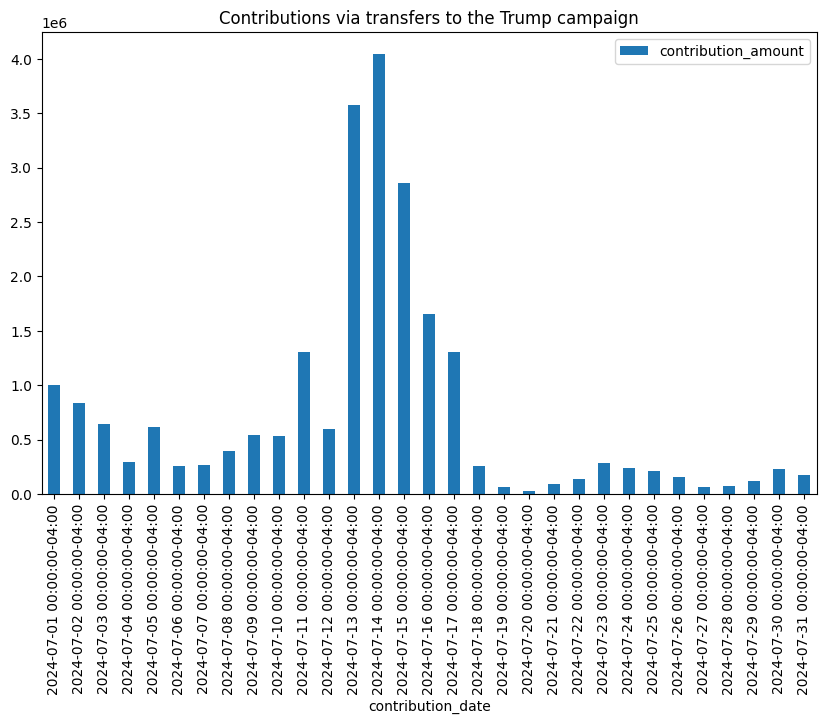

In [40]:
sa18_chart.plot(x='contribution_date', y='contribution_amount', kind='bar', figsize=(10,6), title= 'Contributions via transfers to the Trump campaign')

## SA17C

In [41]:
sa17c= df[df.form_type=='SA17C']
sa17c= sa17c.reset_index(drop=False)
sa17c

,index,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,29447,SA17C,C00828541,SA17C.125139774,,,PAC,BIG IDEAS CREATE EXCELLENCE PAC,,,,,,PO BOX 21315,,OKLAHOMA CITY,OK,73156,P2024,,2024-07-18 00:00:00-04:00,5000.0,10000.0,,,,C00765644,BIG IDEAS CREATE EXCELLENCE PAC,,,,,,,,,,,,,,,,,,
1,29448,SA17C,C00828541,SA17C.125956814,,,PAC,DAKOTA LEADERSHIP PAC,,,,,,PO BOX 278,,MITCHELL,SD,67301,P2024,,2024-07-18 00:00:00-04:00,3300.0,5000.0,,,,C00688549,DAKOTA LEADERSHIP PAC,,,,,,,,,,,,,,,,,,
2,29449,SA17C,C00828541,SA17C.125956814.2,,,PAC,DAKOTA LEADERSHIP PAC,,,,,,PO BOX 278,,MITCHELL,SD,67301,G2024,,2024-07-18 00:00:00-04:00,1700.0,5000.0,,,,C00688549,DAKOTA LEADERSHIP PAC,,,,,,,,,,,,,,,,X,,
3,29450,SA17C,C00828541,SA17C.124440731,,,PAC,REPUBLICAN MAJORITY FUND,,,,,,901 N WASHINGTON ST,STE 700,ALEXANDRIA,VA,22314,P2024,,2024-07-18 00:00:00-04:00,5000.0,10000.0,,,,C00296640,REPUBLICAN MAJORITY FUND,,,,,,,,,,,,,,,,,,


In [42]:
sa17c.contribution_amount.sum()

15000.0

## Group SA17A and SA18

In [46]:
grouped_contrib = pd.concat([sa17a_memo, sa18_IND]).reset_index(drop=True)
grouped_contrib

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code,range
0,SA17A,C00828541,SA17A.122129412,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,,,3803 SPRUCE BEND LN,,SPRING,TX,77386,P2024,,2024-07-01 00:00:00-04:00,-8.10,2828.79,EARMARKED THROUGH WINRED,TEXAS EXTRUSION SERV,OWNER,,,,,,,,,,,,,,,,,,,CHARGEBACK,,NaN
1,SA17A,C00828541,SA17A.122129413,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,,,3803 SPRUCE BEND LN,,SPRING,TX,77386,P2024,,2024-07-01 00:00:00-04:00,-8.10,2828.79,EARMARKED THROUGH WINRED,TEXAS EXTRUSION SERV,OWNER,,,,,,,,,,,,,,,,,,,CHARGEBACK,,NaN
2,SA17A,C00828541,SA17A.122129414,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,,,3803 SPRUCE BEND LN,,SPRING,TX,77386,P2024,,2024-07-01 00:00:00-04:00,-8.10,2828.79,EARMARKED THROUGH WINRED,TEXAS EXTRUSION SERV,OWNER,,,,,,,,,,,,,,,,,,,CHARGEBACK,,NaN
3,SA17A,C00828541,SA17A.122129415,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,,,3803 SPRUCE BEND LN,,SPRING,TX,77386,P2024,,2024-07-01 00:00:00-04:00,-9.00,2828.79,EARMARKED THROUGH WINRED,TEXAS EXTRUSION SERV,OWNER,,,,,,,,,,,,,,,,,,,CHARGEBACK,,NaN
4,SA17A,C00828541,SA17A.122129417,SA17A.122113967,SA17A,IND,,KORES,SHARON,K,,,3803 SPRUCE BEND LN,,SPRING,TX,77386,P2024,,2024-07-01 00:00:00-04:00,-22.50,2828.79,EARMARKED THROUGH WINRED,TEXAS EXTRUSION SERV,OWNER,,,,,,,,,,,,,,,,,,,CHARGEBACK,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521138,SA18,C00828541,SA18.127518842,SA18.126030682,SA18,IND,,ZYWICIEL,DALE,,,,10 WHITECLIFF,,LAGUNA NIGUEL,CA,92677,P2024,,2024-07-15 00:00:00-04:00,24.47,531.64,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,,Below 1
521139,SA18,C00828541,SA18.127552877,SA18.126030682,SA18,IND,,TRUE,JEFFREY,,,,4116 MAIN ST,,UNION GAP,WA,98903,P2024,,2024-06-15 00:00:00-04:00,52.05,478.86,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,SELF-EMPLOYED,USED AUTO DEALERSHIP,,,,,,,,,,,,,,,,,,X,,,50-74
521140,SA18,C00828541,SA18.127552878,SA18.126030682,SA18,IND,,TRUE,JEFFREY,,,,4116 MAIN ST,,UNION GAP,WA,98903,P2024,,2024-07-15 00:00:00-04:00,52.05,478.86,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,SELF-EMPLOYED,USED AUTO DEALERSHIP,,,,,,,,,,,,,,,,,,X,,,50-74
521141,SA18,C00828541,SA18.127439497,SA18.126030682,SA18,IND,,TRUE,LYNDA,,,,11872 S EL CAMINO DEL DIABLO,,YUMA,AZ,85367,P2024,,2024-07-04 00:00:00-04:00,5.00,256.62,JFC TRANSFER: TRUMP SAVE AMERICA JOINT FUNDRAI...,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,,1-24


## Sum of SA17A and SA18 daily

In [44]:
grouped_contrib_daily = grouped_contrib.resample('D', on='contribution_date').contribution_amount.sum().to_frame().reset_index()
grouped_contrib_daily = grouped_contrib_daily.sort_values('contribution_date')
grouped_contrib_daily = grouped_contrib_daily[grouped_contrib_daily.contribution_date>='2024-07-01'].reset_index(drop=True) #only June
grouped_contrib_daily 

,contribution_date,contribution_amount
0,2024-07-01 00:00:00-04:00,1380384.94
1,2024-07-02 00:00:00-04:00,953565.07
2,2024-07-03 00:00:00-04:00,848877.90
3,2024-07-04 00:00:00-04:00,298828.40
4,2024-07-05 00:00:00-04:00,1298454.08
5,2024-07-06 00:00:00-04:00,263467.57
6,2024-07-07 00:00:00-04:00,270128.18
7,2024-07-08 00:00:00-04:00,526939.92
8,2024-07-09 00:00:00-04:00,640793.47
9,2024-07-10 00:00:00-04:00,676005.40


In [45]:
grouped_contrib_daily.to_csv('trump_sa17a_sa18_daily_july.csv', index=False)

In [44]:
categories_group= grouped_contrib.groupby(['range', 'form_type']).contribution_amount.sum().to_frame().reset_index()
categories_group

,range,form_type,contribution_amount
0,1-24,SA17A,70250.92
1,1-24,SA18,1717002.77
2,100-149,SA17A,520620.28
3,100-149,SA18,243257.02
4,150-199,SA17A,110604.92
5,150-199,SA18,455472.74
6,200 and over,SA17A,3692886.51
7,200 and over,SA18,11444860.65
8,25-49,SA17A,100374.69
9,25-49,SA18,2125267.21


## Save group

In [57]:
# categories_group.to_csv('trump.csv', index=False)

## By location

In [47]:
grouped_location = grouped_contrib.groupby('contributor_state').contribution_amount.sum().to_frame().reset_index()
grouped_location.sort_values('contribution_amount', ascending=False).head(10)

,contributor_state,contribution_amount
8,CA,4293673.15
13,FL,3503262.57
50,TX,3385255.57
41,OH,1520075.89
40,NY,1442341.39
14,GA,1071439.80
52,VA,994740.35
7,AZ,948297.04
44,PA,921571.75
33,NC,918130.61


## Group by for charting

In [ ]:
# for_charting = grouped_contrib.groupby(['form_type', 'contributor_first_name', 'contributor_last_name', "contributor_street_1", "memo_text_description"]).contribution_amount.sum().to_frame().reset_index()
# for_charting

In [ ]:
# for_charting.to_clipboard(index=False)
#check in Excel, also good to keep this raw file

In [ ]:
# for_charting.contribution_amount.sum()
#check

In [ ]:
# for_charting.memo_text_description.value_counts()

## We're now ready to chart!

## Other forms:

- SA21: Amount of receipts from interest, dividends and repayment of loans
- SA 20A: Refunds

## SA21

In [45]:
sa21= df[df.form_type=='SA21']
sa21= sa21.reset_index(drop=False)
sa21

,index,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,494370,SA21,C00828541,SA21.121957804,,,ORG,CHAIN BRIDGE BANK NA,,,,,,1455-A LAUGHLIN AVE,,MCLEAN,VA,22101,P2024,,2024-06-28 00:00:00-04:00,245052.56,915105.97,INTEREST REVENUE,,,,,,,,,,,,,,,,,,,,,,
1,494371,SA21,C00828541,SA21.122113942,,,ORG,CHAIN BRIDGE BANK NA,,,,,,1455-A LAUGHLIN AVE,,MCLEAN,VA,22101,P2024,,2024-06-30 00:00:00-04:00,66625.12,866494.33,INTEREST REVENUE,,,,,,,,,,,,,,,,,,,,,,
2,494372,SA21,C00828541,SA21.121957801,,,ORG,FIDELITY INVESTMENTS,,,,,,PO BOX 770001,,CINCINNATI,OH,45277,P2024,,2024-06-28 00:00:00-04:00,4859.82,11786.47,INTEREST REVENUE,,,,,,,,,,,,,,,,,,,,,,
3,494373,SA21,C00828541,SA21.119159078.2,,,IND,,COCHRAN,GUY,S,,,900 COCHRAN FARM RD,,DUBLIN,GA,31201,E2024,Recount,2024-06-11 00:00:00-04:00,494.60,7094.60,REDESIGNATION FROM PRIMARY,SELF-EMPLOYED,RETAIL,,,,,,,,,,,,,,,,,,X,,
4,494374,SA21,C00828541,SA21.120754865.4,,,IND,,DAVIS,MARK,,,,37045 US HIGHWAY 169,,SAINT PETER,MN,56082,E2024,Recount,2024-06-13 00:00:00-04:00,3300.00,10000.00,REDESIGNATION FROM PRIMARY,INFORMATION REQUESTED,INFORMATION REQUESTED,,,,,,,,,,,,,,,,,,X,,
5,494375,SA21,C00828541,SA21.118948456.4,,,IND,,FRAZEE,SAMUEL,R,,,1236 COAST VILLAGE CIR,STE E,SANTA BARBARA,CA,93108,E2024,Recount,2024-06-07 00:00:00-04:00,1370.00,7970.00,REDESIGNATION FROM PRIMARY,FRAZEE ENTERPRISES,SELF-EMPLOYED,,,,,,,,,,,,,,,,,,X,,
6,494376,SA21,C00828541,SA21.121641861.4,,,IND,,GARGAN,KATHLEEN,,,,18251 JOHNSON RD,,BAKERSFIELD,CA,93314,E2024,Recount,2024-06-18 00:00:00-04:00,1800.00,8400.00,REDESIGNATION FROM PRIMARY,FARM PUMP AND IRRIGATION,PRESIDENT,,,,,,,,,,,,,,,,,,X,,
7,494377,SA21,C00828541,SA21.118353441.4,,,IND,,HOGAN,MICHAEL,J,,,45 STILLWATER DR,,WARWICK,RI,02889,E2024,Recount,2024-06-03 00:00:00-04:00,1700.00,8300.00,REDESIGNATION FROM PRIMARY,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
8,494378,SA21,C00828541,SA21.121784892.5,,,IND,,JAGODINSKI,WALTER,T,,,6415 THOMAS DR,UNIT 1702,PANAMA CITY,FL,32408,E2024,Recount,2024-06-21 00:00:00-04:00,3300.00,9900.00,REDESIGNATION FROM PRIMARY,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
9,494379,SA21,C00828541,SA21.120754867.4,,,IND,,LOPEZ,ALBA,G,,,8360 VIETOR AVE,APT 3N,ELMHURST,NY,11373,E2024,Recount,2024-06-13 00:00:00-04:00,1700.00,8300.00,REDESIGNATION FROM PRIMARY,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,


In [46]:
sa21.contribution_amount.sum()

341642.55

## SA-21 but with only memo code

In [52]:
sa21_memo_x= sa21[sa21.memo_code=='X'].reset_index(drop=True)
sa21_memo_x

,index,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,494373,SA21,C00828541,SA21.119159078.2,,,IND,,COCHRAN,GUY,S,,,900 COCHRAN FARM RD,,DUBLIN,GA,31201,E2024,Recount,2024-06-11 00:00:00-04:00,494.60,7094.60,REDESIGNATION FROM PRIMARY,SELF-EMPLOYED,RETAIL,,,,,,,,,,,,,,,,,,X,,
1,494374,SA21,C00828541,SA21.120754865.4,,,IND,,DAVIS,MARK,,,,37045 US HIGHWAY 169,,SAINT PETER,MN,56082,E2024,Recount,2024-06-13 00:00:00-04:00,3300.00,10000.00,REDESIGNATION FROM PRIMARY,INFORMATION REQUESTED,INFORMATION REQUESTED,,,,,,,,,,,,,,,,,,X,,
2,494375,SA21,C00828541,SA21.118948456.4,,,IND,,FRAZEE,SAMUEL,R,,,1236 COAST VILLAGE CIR,STE E,SANTA BARBARA,CA,93108,E2024,Recount,2024-06-07 00:00:00-04:00,1370.00,7970.00,REDESIGNATION FROM PRIMARY,FRAZEE ENTERPRISES,SELF-EMPLOYED,,,,,,,,,,,,,,,,,,X,,
3,494376,SA21,C00828541,SA21.121641861.4,,,IND,,GARGAN,KATHLEEN,,,,18251 JOHNSON RD,,BAKERSFIELD,CA,93314,E2024,Recount,2024-06-18 00:00:00-04:00,1800.00,8400.00,REDESIGNATION FROM PRIMARY,FARM PUMP AND IRRIGATION,PRESIDENT,,,,,,,,,,,,,,,,,,X,,
4,494377,SA21,C00828541,SA21.118353441.4,,,IND,,HOGAN,MICHAEL,J,,,45 STILLWATER DR,,WARWICK,RI,02889,E2024,Recount,2024-06-03 00:00:00-04:00,1700.00,8300.00,REDESIGNATION FROM PRIMARY,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
5,494378,SA21,C00828541,SA21.121784892.5,,,IND,,JAGODINSKI,WALTER,T,,,6415 THOMAS DR,UNIT 1702,PANAMA CITY,FL,32408,E2024,Recount,2024-06-21 00:00:00-04:00,3300.00,9900.00,REDESIGNATION FROM PRIMARY,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
6,494379,SA21,C00828541,SA21.120754867.4,,,IND,,LOPEZ,ALBA,G,,,8360 VIETOR AVE,APT 3N,ELMHURST,NY,11373,E2024,Recount,2024-06-13 00:00:00-04:00,1700.00,8300.00,REDESIGNATION FROM PRIMARY,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
7,494380,SA21,C00828541,SA21.121784439.4,,,IND,,MURRAY,ROBERT,,,,1745 N NYE AVE,,FREMONT,NE,68025,E2024,Recount,2024-06-21 00:00:00-04:00,3300.00,10000.00,REDESIGNATION FROM PRIMARY,INFORMATION REQUESTED,INFORMATION REQUESTED,,,,,,,,,,,,,,,,,,X,,
8,494381,SA21,C00828541,SA21.120754370.4,,,IND,,PABST,KRISTIE,,,,291 SAINT JOSEPH AVE,# 0,LONG BEACH,CA,90803,E2024,Recount,2024-06-13 00:00:00-04:00,1100.00,7700.00,REDESIGNATION FROM PRIMARY,KINNEY AND ASSOCIATES,REAL ESTATE BROKER,,,,,,,,,,,,,,,,,,X,,
9,494382,SA21,C00828541,SA21.121518541.4,,,IND,,PEARSON,PAUL,,,,PO BOX 318,,WHEATON,IL,60187,E2024,Recount,2024-06-14 00:00:00-04:00,3300.00,10000.00,REDESIGNATION FROM PRIMARY,MEDICAL COLLEGE OF WISCONSIN,HEART SURGEON,,,,,,,,,,,,,,,,,,X,,


In [53]:
sa21_memo_x.contribution_amount.sum()

25105.05

## SA 20A

Refunds

In [54]:
sa20a= df[df.form_type=='SA20A']
sa20a= sa20a.reset_index(drop=False)
sa20a

,index,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,494359,SA20A,C00828541,SA20A.121559283,,,COM,TRUMP 47 COMMITTEE,,,,,,P.O. BOX 509,,ARLINGTON,VA,22216,P2024,,2024-06-20 00:00:00-04:00,92628.16,6260934.05,REIMBURSEMENT: FUNDRAISING EXPENSES,,,C00867937,"TRUMP 47 COMMITTEE, INC.",,,,,,,,,,,,,,,,,,
1,494360,SA20A,C00828541,SA20A.121675776,,,COM,TRUMP 47 COMMITTEE,,,,,,P.O. BOX 509,,ARLINGTON,VA,22216,P2024,,2024-06-24 00:00:00-04:00,53575.56,6260934.05,REIMBURSEMENT: FUNDRAISING EXPENSES,,,C00867937,"TRUMP 47 COMMITTEE, INC.",,,,,,,,,,,,,,,,,,
2,494361,SA20A,C00828541,SA20A.118142203,,,ORG,USSS,,,,,,950 H ST NW #7800,,WASHINGTON,DC,20223,P2024,,2024-06-04 00:00:00-04:00,2323.90,1146804.98,REFUND: TRAVEL: AIR,,,,,,,,,,,,,,,,,,,,,,
3,494362,SA20A,C00828541,SA20A.118142204,,,ORG,USSS,,,,,,950 H ST NW #7800,,WASHINGTON,DC,20223,P2024,,2024-06-04 00:00:00-04:00,7532.13,1146804.98,REFUND: TRAVEL: AIR,,,,,,,,,,,,,,,,,,,,,,
4,494363,SA20A,C00828541,SA20A.118142205,,,ORG,USSS,,,,,,950 H ST NW #7800,,WASHINGTON,DC,20223,P2024,,2024-06-04 00:00:00-04:00,23795.33,1146804.98,REFUND: TRAVEL: AIR,,,,,,,,,,,,,,,,,,,,,,
5,494364,SA20A,C00828541,SA20A.121823562,,,ORG,USSS,,,,,,950 H ST NW #7800,,WASHINGTON,DC,20223,P2024,,2024-06-26 00:00:00-04:00,18860.00,1146804.98,REFUND: TRAVEL: AIR,,,,,,,,,,,,,,,,,,,,,,
6,494365,SA20A,C00828541,SA20A.121823563,,,ORG,USSS,,,,,,950 H ST NW #7800,,WASHINGTON,DC,20223,P2024,,2024-06-26 00:00:00-04:00,22056.77,1146804.98,REFUND: TRAVEL: AIR,,,,,,,,,,,,,,,,,,,,,,
7,494366,SA20A,C00828541,SA20A.121823564,,,ORG,USSS,,,,,,950 H ST NW #7800,,WASHINGTON,DC,20223,P2024,,2024-06-26 00:00:00-04:00,42202.67,1146804.98,REFUND: TRAVEL: AIR,,,,,,,,,,,,,,,,,,,,,,
8,494367,SA20A,C00828541,SA20A.121823565,,,ORG,USSS,,,,,,950 H ST NW #7800,,WASHINGTON,DC,20223,P2024,,2024-06-26 00:00:00-04:00,7175.00,1146804.98,REFUND: TRAVEL: AIR,,,,,,,,,,,,,,,,,,,,,,
9,494368,SA20A,C00828541,SA20A.121823566,,,ORG,USSS,,,,,,950 H ST NW #7800,,WASHINGTON,DC,20223,P2024,,2024-06-26 00:00:00-04:00,51883.62,1146804.98,REFUND: TRAVEL: AIR,,,,,,,,,,,,,,,,,,,,,,


In [55]:
sa20a.contribution_amount.sum()

346309.93